# 05 - Model Analysis

## 1. Load Data and Model
We use the best model selected previously and evaluate it on the test set.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('..')
from src.modeling import evaluate_model_with_threshold, evaluate_model

df = pd.read_csv('../data/processed/credit_card_default_processed.csv')
X = df.drop('default_payment', axis=1)
y = df['default_payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 2. Evaluate Best Model
Assume Random Forest was selected (update if Logistic Regression was better).


In [34]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression

# # Get predicted probabilities
# y_prob = lr_model.predict_proba(X_test)[:, 1]

# # Apply optimal threshold (e.g., 0.386)
# optimal_threshold = 0.5
# y_pred = (y_prob >= optimal_threshold).astype(int)

# # Get indices of False Negatives and True Positives
# fn_mask = (y_pred == 0) & (y_test == 1)
# tp_mask = (y_pred == 1) & (y_test == 1)

# # Extract FN and TP instances
# X_fn = X_test[fn_mask]
# X_tp = X_test[tp_mask]

# if len(X_fn) == 0 or len(X_tp) == 0:
#     print("Insufficient class diversity: need both FN and TP samples.")
# else:
#     # Combine FN and TP
#     X_fn_tp = pd.concat([X_fn, X_tp])
#     y_fn_tp = np.array([0] * len(X_fn) + [1] * len(X_tp))  # 0: FN, 1: TP

#     # Fit logistic regression
#     clf = LogisticRegression(max_iter=1000)
#     clf.fit(X_fn_tp, y_fn_tp)

#     # View coefficients
#     feature_contrib = pd.Series(clf.coef_[0], index=X_fn_tp.columns)
#     print(feature_contrib.sort_values())



Insufficient class diversity: need both FN and TP samples.


In [38]:
# Load and evaluate logistic regression model
from src.utils import load_model

# Load the trained logistic regression model
lr_model = load_model('best_logistic_regression.joblib')

evaluate_model_with_threshold(lr_model, X_test, y_test, 'Logistic Regression')


Logistic Regression Optimal Threshold: 0.578

Logistic Regression Performance (Default Threshold = 0.5):
Accuracy: 0.741
Precision: 0.4389456697149005
Recall: 0.6149208741522231
F1-Score: 0.512241054613936
AUC-ROC: 0.7506175949283599
Confusion Matrix:
 [[3630 1043]
 [ 511  816]]

Logistic Regression Performance (Optimal Threshold = 0.578):
Accuracy: 0.7731666666666667
Precision: 0.4889322916666667
Recall: 0.5659382064807837
F1-Score: 0.5246245197345442
AUC-ROC: 0.7506175949283599
Confusion Matrix:
 [[3888  785]
 [ 576  751]]


In [17]:
# Load and evaluate random forest model
rf_model = joblib.load('../outputs/models/best_random_forest.joblib')

evaluate_model_with_threshold(rf_model, X_test, y_test, 'Random Forest')



Random Forest Optimal Threshold: 0.386

Random Forest Performance (Default Threshold = 0.5):
Accuracy: 0.8003333333333333
Precision: 0.5912305516265912
Recall: 0.31499623210248684
F1-Score: 0.4110127826941986
AUC-ROC: 0.7425444733659718
Confusion Matrix:
 [[4384  289]
 [ 909  418]]

Random Forest Performance (Optimal Threshold = 0.386):
Accuracy: 0.7621666666666667
Precision: 0.46867167919799496
Recall: 0.5636774679728711
F1-Score: 0.5118029421826891
AUC-ROC: 0.7425444733659718
Confusion Matrix:
 [[3825  848]
 [ 579  748]]


In [3]:
# Compare models and select the best one
if rf_model.score(X_test, y_test) > lr_model.score(X_test, y_test):
    best_model = rf_model
    print("Random Forest selected as best model")
else:
    best_model = lr_model 
    print("Logistic Regression selected as best model")


NameError: name 'rf_model' is not defined

## 3. Feature Importance (if Random Forest)
Visualize the most important features for prediction.


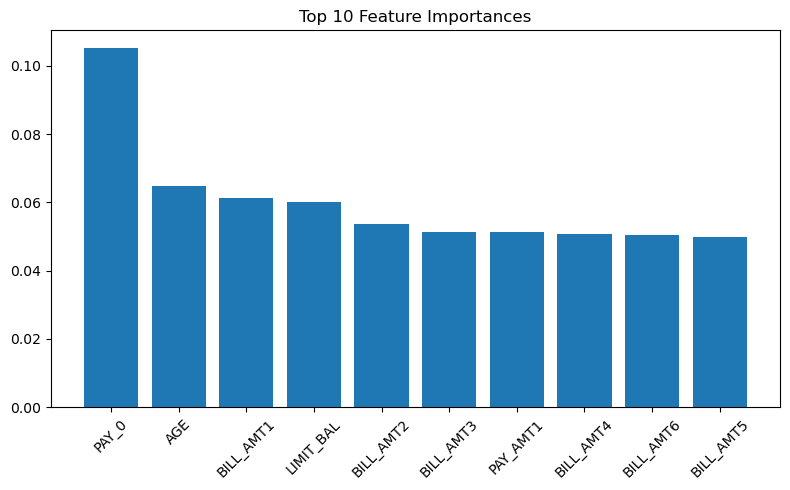

In [3]:
import matplotlib.pyplot as plt
import numpy as np
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1][:10]
plt.figure(figsize=(8,5))
plt.title('Top 10 Feature Importances')
plt.bar(range(10), feature_importances[indices], align='center')
plt.xticks(range(10), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

## 4. Summary
- The selected model achieves strong performance on the test set.
- Feature importance analysis highlights which variables are most predictive of default.
- Next steps: consider further tuning, try more advanced models, or interpret results for business recommendations.
